In [1]:
import pandas as pd

LOCAL = '../data/tanzania/'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/'

train_features = pd.read_csv(WEB + 'train_features.csv')
train_labels = pd.read_csv(WEB + 'train_labels.csv')
test_features = pd.read_csv(WEB + 'test_features.csv')
sample_submission = pd.read_csv(WEB + 'sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [2]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [6]:
y_train = train_labels['status_group']
y_train.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [7]:
#Use mode as a baseline model
majority_class = y_train.mode()[0]
y_pred = [majority_class]*len(y_train)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_pred)

0.543080808080808

In [9]:
# Split your training data. Default split is 75-25 %
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

# Straify option is there to make sure the split tries to maintain the distribution 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)


In [10]:
#We just split train_features into X_train and X_val
X_train.shape, X_val.shape, train_features.shape

((44550, 40), (14850, 40), (59400, 40))

In [11]:
y_train.value_counts(normalize=True)

functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64

In [12]:
y_val.value_counts(normalize=True)

functional                 0.543098
non functional             0.384242
functional needs repair    0.072660
Name: status_group, dtype: float64

In [13]:
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

In [14]:
X_train.shape, X_train_numeric.shape #only 10 numeric features

((44550, 40), (44550, 10))

In [15]:
X_train_numeric.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [16]:
#Logistic model first
from sklearn.linear_model import LogisticRegression

#Be sure to use a larger max_iter than default
model = LogisticRegression(solver='lbfgs', multi_class ='auto', max_iter=10000)
model.fit(X_train_numeric, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = model.predict(X_val_numeric)

In [18]:
accuracy_score(y_val,y_pred)
#Hmm... hardly any better (only1% improvement)
# apparently, the numberic features don't improve prediction better than our initial baseline

0.5503703703703704

In [19]:
#Next, add categorical features
# Add quantity feature
X_train['quantity'].value_counts(dropna=False)

enough          24909
insufficient    11376
dry              4628
seasonal         3039
unknown           598
Name: quantity, dtype: int64

In [20]:
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(X_train['quantity'])
encoded.sample(5)

,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_dry,quantity_unknown
41327,0,1,0,0,0
9839,1,0,0,0,0
53299,0,0,0,1,0
57987,0,1,0,0,0
28667,0,1,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
categorical_features = ['quantity']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


Validation Accuracy 0.6556228956228957


In [22]:
X_train_encoded[:1]

,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_dry,quantity_unknown,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
35240,1,0,0,0,0,200.0,1757,34.58874,-9.786994,0,11,5,75,2001


In [23]:
import matplotlib.pyplot as plt

coefs = pd.Series(model.coef_[0], X_train_encoded.columns)
coefs.sort_values().plot.barh();

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

LOCAL = '../data/tanzania/'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Tree-Ensembles/master/data/tanzania/'
source = WEB

train = pd.merge(pd.read_csv(source + 'train_features.csv'), 
                 pd.read_csv(source + 'train_labels.csv'))
test = pd.read_csv(source + 'test_features.csv')

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [25]:
train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2904
gps_height                   0
installer                 2917
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 286
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2644
recorded_by                  0
scheme_management         3128
scheme_name              22532
permit                    2443
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [26]:
import numpy as np
import pandas as pd

def wrangle(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy() # We operate on a copy so that if function is corrupted in any way, 
                 # we don't affect original dataframe. Original memory sits temporarily in limbo.
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace them with the column mean.
    cols_with_zeros = ['construction_year', 'longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col] = X[col].fillna(X[col].mean())
#         X[col] = X[col].replace(0, X[col].mean())
        
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract year from date_recorded
    X['year_recorded'] = X['date_recorded'].dt.year
    
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns='quantity_group')
    
    # for categoricals with missing values, fill with the category 'MISSING'
    categoricals = X.select_dtypes(exclude='number').columns
    for col in categoricals:
        X[col] = X[col].fillna('MISSING')
    
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [27]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'year_recorded'],
      dtype='object')

In [28]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 10
categorical_features = cardinality[(cardinality <= 4) & (cardinality>1)].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [29]:
cardinality.sort_values(ascending=False)

wpt_name                 30661
subvillage               17232
scheme_name               2564
ward                      2082
installer                 1930
funder                    1717
date_recorded              349
lga                        124
region                      21
extraction_type             18
extraction_type_group       13
scheme_management           13
management                  12
source                      10
basin                        9
water_quality                8
extraction_type_class        7
waterpoint_type              7
source_type                  7
payment                      7
payment_type                 7
waterpoint_type_group        6
quality_group                6
management_group             5
quantity                     5
permit                       3
source_class                 3
public_meeting               3
recorded_by                  1
dtype: int64

In [30]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Encoder: fit_transform on train, transform on val & test
#encoder = ce.OneHotEncoder(use_cat_names=True)
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Scaler: fit_transform on train, transform on val & test
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Model: Fit on train, score on val, predict on test
model = LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))
y_pred = model.predict(X_test_scaled)

# Write submission csv file
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-02.csv', index=False)

Validation Accuracy 0.58493265993266


In [31]:
train[features]

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,public_meeting,permit,source_class
43360,0.0,0,33.542898,-9.174777,0,12,4,0,1996.825469,2011,True,MISSING,groundwater
7263,500.0,2049,34.665760,-9.308548,0,11,4,175,2008.000000,2011,True,True,groundwater
2486,25.0,290,38.238568,-6.179919,0,6,1,2300,2010.000000,2011,True,False,groundwater
313,0.0,0,30.716727,-1.289055,0,18,1,0,1996.825469,2011,True,True,groundwater
52726,0.0,0,35.389331,-6.399942,0,1,6,0,1996.825469,2011,True,True,groundwater
8558,0.0,1295,31.214583,-8.431428,0,15,2,200,1986.000000,2011,True,True,surface
2559,20000.0,1515,36.696700,-3.337926,0,2,2,150,1995.000000,2013,True,True,groundwater
54735,0.0,0,36.292724,-5.177333,0,1,1,0,1996.825469,2011,True,False,groundwater
25763,0.0,0,32.877248,-8.925921,0,12,6,0,1996.825469,2011,False,False,groundwater
44540,0.0,0,33.014412,-3.115869,0,19,7,0,1996.825469,2011,True,True,groundwater


In [32]:
np.prod(X_train_scaled.shape)

617760

In [33]:
from sklearn.tree import DecisionTreeClassifier
max_dt_depth = 10
dt = DecisionTreeClassifier(max_depth=max_dt_depth,random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [34]:
print(f'Decision Tree Model: Max Depth ={max_dt_depth}')
print(f'Train Acc: {dt.score(X_train_scaled, y_train)}')
print(f'Val Acc: {dt.score(X_val_scaled, y_val)}')

Decision Tree Model: Max Depth =10
Train Acc: 0.6915824915824916
Val Acc: 0.6553872053872054


In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

LOCAL = '../data/tanzania/'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Tree-Ensembles/master/data/tanzania/'
source = WEB

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(source + 'train_features.csv'), 
                 pd.read_csv(source + 'train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(source + 'test_features.csv')
sample_submission = pd.read_csv(source + 'sample_submission.csv')

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)


def wrangle(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy()

    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']    
    
    # Drop recorded_by (never varies) and id (always varies, random)
    X = X.drop(columns=['recorded_by', 'id'])
    
    # Drop duplicate columns
    duplicate_columns = ['quantity_group']
    X = X.drop(columns=duplicate_columns)
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these like null values
    X['latitude'] = X['latitude'].replace(-2e-08, np.nan)
    
    # When columns have zeros and shouldn't, they are like null values
    cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [36]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[(cardinality <= 50) & (cardinality >=1)].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [37]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [38]:
# Make pipeline!
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier(max_depth=20, random_state=42)
)

# Fit on train, score on val, predict on test
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7712121212121212


In [39]:
X_train.shape

(47520, 33)

In [59]:
from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    #ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
# Fit on train, score on val, predict on test
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

# Write submission csv file
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission.csv', index=False)

Validation Accuracy 0.8106902356902357


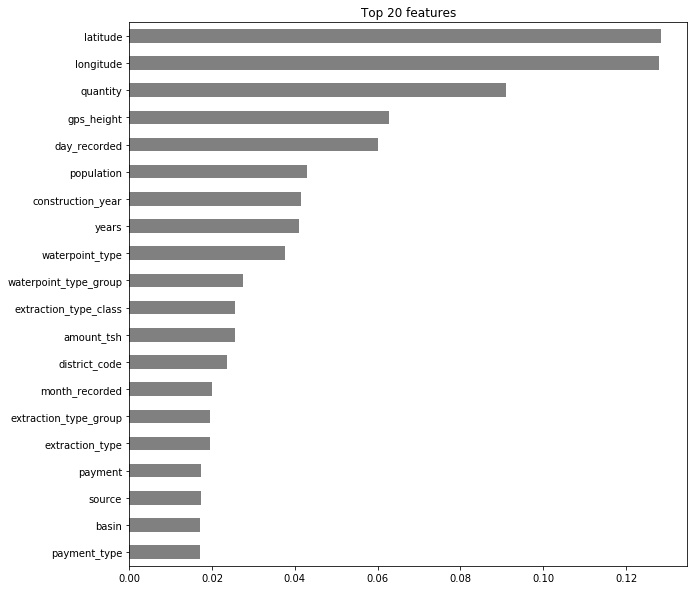

In [41]:
# Get feature importances
encoder = pipeline.named_steps['ordinalencoder']
tree = pipeline.named_steps['randomforestclassifier']

feature_names = encoder.transform(X_val).columns

importances = pd.Series(tree.feature_importances_, feature_names)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [51]:
# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(source + 'train_features.csv'), 
                 pd.read_csv(source + 'train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(source + 'test_features.csv')
sample_submission = pd.read_csv(source + 'sample_submission.csv')

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)


def wrangle(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy()

    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']    
    
    # Drop recorded_by (never varies) and id (always varies, random)
    X = X.drop(columns=['recorded_by', 'id'])
    
    # Drop duplicate columns
    duplicate_columns = ['quantity_group']
    X = X.drop(columns=duplicate_columns)
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these like null values
    X['latitude'] = X['latitude'].replace(-2e-08, np.nan)
    
    # When columns have zeros and shouldn't, they are like null values
    cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [52]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[(cardinality <= 50) & (cardinality >=1)].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [53]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [54]:
ordinal_cols_mapping = [{
    "col": "quantity",    
    "mapping": {
        'insufficient':5, 
        'enough':4, 
        'dry':3, 
        'seasonal':2, 
        'unknown':1 
    }},
]

encoder = ce.OrdinalEncoder(mapping=ordinal_cols_mapping)
#encoded = encoder.fit_transform(X_train[['quantity']])
encoded = encoder.fit_transform(X_train)
encoded[15:30]

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
1373,0.0,1466.0,37.501573,-3.277989,0,3,4,15.0,1972.0,2013,...,never pay,never pay,soft,good,4,spring,spring,groundwater,communal standpipe,communal standpipe
2026,6500.0,1969.0,35.371400,-4.470802,0,21,2,162.0,2003.0,2013,...,pay annually,annually,soft,good,4,spring,spring,groundwater,communal standpipe,communal standpipe
58977,0.0,319.0,38.018784,-9.568769,0,80,43,250.0,2006.0,2013,...,unknown,unknown,soft,good,3,shallow well,shallow well,groundwater,hand pump,hand pump
41101,500.0,884.0,29.660968,-4.818648,0,16,3,1500.0,1985.0,2013,...,pay monthly,monthly,soft,good,2,river,river/lake,surface,communal standpipe multiple,communal standpipe
10019,10.0,1472.0,35.714295,-3.314773,0,24,30,150.0,1994.0,2013,...,pay per bucket,per bucket,soft,good,4,river,river/lake,surface,communal standpipe,communal standpipe
5103,0.0,1274.0,30.241727,-4.182626,0,16,2,4210.0,1996.0,2013,...,never pay,never pay,soft,good,4,shallow well,shallow well,groundwater,hand pump,hand pump
36712,25.0,1551.0,31.023716,-7.490116,0,15,3,1.0,1995.0,2011,...,pay per bucket,per bucket,soft,good,5,shallow well,shallow well,groundwater,hand pump,hand pump
29670,0.0,292.0,35.944307,-8.525588,0,5,3,500.0,1980.0,2011,...,never pay,never pay,soft,good,5,river,river/lake,surface,communal standpipe,communal standpipe
54588,0.0,NaN,32.580108,-3.549380,0,17,3,NaN,NaN,2013,...,unknown,unknown,milky,milky,2,shallow well,shallow well,groundwater,hand pump,hand pump
31867,200.0,217.0,36.679869,-8.157754,0,5,3,280.0,1979.0,2011,...,pay monthly,monthly,soft,good,5,shallow well,shallow well,groundwater,hand pump,hand pump


In [143]:
ordinal_cols_mapping = [{
    "col": "quantity",    
    "mapping": {
        'insufficient':1, 
        'enough':2, 
        'dry':4, 
        'seasonal':3, 
        'unknown':5 
    }},
]

from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(mapping=ordinal_cols_mapping),
    #ce.OrdinalEncoder(),
    #ce.OneHotEncoder(use_cat_names=True), 
    #ce.OneHotEncoder(cols="quantity",use_cat_names=True),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
# Fit on train, score on val, predict on test
#pipeline.fit(X_train, y_train)
#print('Validation Accuracy', pipeline.score(X_val, y_val))
#y_pred = pipeline.predict(X_test)

In [145]:
from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(
    #ce.OrdinalEncoder(),
    ce.OneHotEncoder(use_cat_names=True),
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
# Fit on train, score on val, predict on test
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.8087542087542088


In [140]:
encoder = pipeline.named_steps['ordinalencoder']
X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded.head(5)


,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43360,0.0,NaN,33.542898,-9.174777,0,12,4,NaN,NaN,2011,...,1,1,1,1,insufficient,1,1,1,1,1
7263,500.0,2049.0,34.665760,-9.308548,0,11,4,175.0,2008.0,2011,...,2,2,1,1,enough,1,1,1,1,1
2486,25.0,290.0,38.238568,-6.179919,0,6,1,2300.0,2010.0,2011,...,3,3,2,2,insufficient,2,2,1,2,2
313,0.0,NaN,30.716727,-1.289055,0,18,1,NaN,NaN,2011,...,1,1,1,1,enough,2,2,1,3,3
52726,0.0,NaN,35.389331,-6.399942,0,1,6,NaN,NaN,2011,...,3,3,1,1,enough,3,3,1,1,1


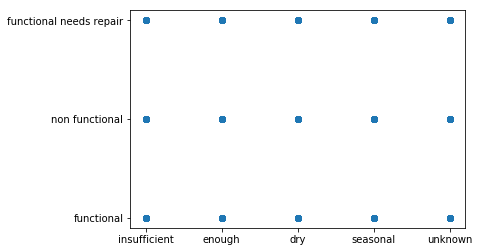

In [72]:
plt.scatter(x=train['quantity'],y=train['status_group'],s=);

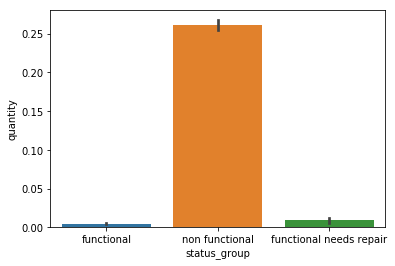

In [109]:
import seaborn as sns
sns.barplot(x=train['status_group'], 
            y=train['quantity']=='dry');

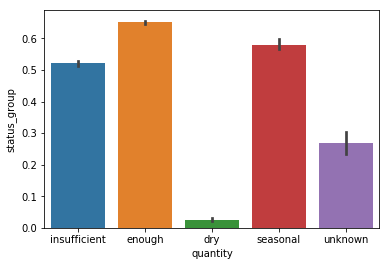

In [80]:
import seaborn as sns
sns.barplot(x=train['quantity'], 
            y=train['status_group']=='functional');

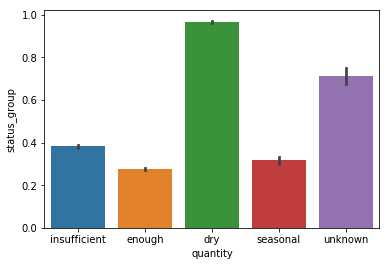

In [79]:
sns.barplot(x=train['quantity'], 
            y=train['status_group']=='non functional');

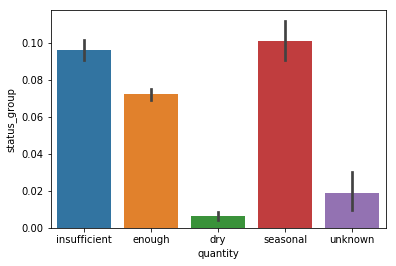

In [78]:
sns.barplot(x=train['quantity'], 
            y=train['status_group']=='functional needs repair');

In [76]:
train['status_group'].value_counts()

functional                 25807
non functional             18259
functional needs repair     3454
Name: status_group, dtype: int64

In [92]:
pipeline = make_pipeline(
    #ce.OrdinalEncoder(mapping=ordinal_cols_mapping),
    ce.OrdinalEncoder(),
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train,y_train)
X_train['quantity'].head(5)

43360    insufficient
7263           enough
2486     insufficient
313            enough
52726          enough
Name: quantity, dtype: object

In [93]:
X_train['quantity'].head(5)

43360    insufficient
7263           enough
2486     insufficient
313            enough
52726          enough
Name: quantity, dtype: object